https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

https://github.com/JustGlowing/minisom

https://plotly.com/python/choropleth-maps/

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
import requests
import zipfile
import io
import geopandas as gpd
import os
from shapely import wkt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
vol_banchi = pd.read_csv("/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/Volontari Banchi_final.csv")
ben_Banchi = pd.read_csv("/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/Beneficiari Banchi_final.csv")
ben_porto = pd.read_csv("/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/Beneficiari Portofranco_final.csv")
vol_porto = pd.read_csv("/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/Volontari Portofranco_final.csv")

## Suddivisione ambiti Beneficiari PortoFranco

In [ ]:
var=[]
for i in ben_porto:
   var.append(i)
split=var[6:-4]
somma=var[5:-4]
#var=var[2:-3]
ben_porto_utile=ben_porto[var]

sex=[]
for i in ben_porto_utile['Sesso']:
  if i=='M':
    sex.append(1)
  else:
    sex.append(0)
ben_porto_utile['Sex']=sex
ben_porto_utile=ben_porto_utile.drop(columns='Sesso')

In [ ]:
# ambito personale
pers=[]
pers.append(var[6])
pers.append(var[8])
pers.append(var[9])
pers.append(var[12])
pers.append(var[13])
pers.append(var[15])
pers.append(var[16])
pers.append(var[19])
ambito_personale = pd.DataFrame()
for i in pers:
  ambito_personale[i]=ben_porto[i]
ambito_personale

,Vado a Portofranco,Sono aumentate le persone di cui mi fido,Sono in generale più contento/a,Sto meglio in famiglia,Ho imparato ad affrontare meglio i problemi,Trovo più facilmente una soluzione ai problemi,Sono più soddisfatto/a di me stesso/a,Sto meglio con i miei amici
0,1,2.0,2.0,3.0,2.0,4.0,2.0,4.0
1,0,3.0,3.0,5.0,2.0,3.0,3.0,3.0
2,0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
3,1,2.0,3.0,4.0,3.0,4.0,3.0,4.0
4,0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
84,0,3.0,4.0,4.0,4.0,4.0,4.0,3.0
85,0,3.0,5.0,2.0,2.0,5.0,2.0,2.0
86,0,4.0,4.0,4.0,4.0,5.0,5.0,4.0
87,0,5.0,4.0,5.0,5.0,5.0,4.0,4.0


In [ ]:
ambito_personale_summary={}
for i in ambito_personale.describe().iterrows():
  if i[0]!='count':
    ambito_personale_summary[i[0]]= np.mean(i[1][0])
ambito_personale_summary

{'mean': 0.34831460674157305,
 'std': 0.6049253071004571,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 1.0,
 'max': 2.0}

In [ ]:
# ambito sociale
soc=[]
soc.append(var[7])
soc.append(var[20])
soc.append(var[21])
soc.append(var[23])
ambito_sociale = pd.DataFrame()
for i in soc:
  ambito_sociale[i]=ben_porto[i]
ambito_sociale

,Ho ottenuto voti più alti a scuola,Mi sento più fiducioso/a negli altri,Sento di avere maggiori energie,Sono più interessato/a allo studio
0,3,3.0,3.0,3
1,3,3.0,3.0,3
2,3,2.0,3.0,2
3,3,2.0,4.0,2
4,3,2.0,2.0,3
...,...,...,...,...
84,3,3.0,3.0,3
85,3,1.0,4.0,3
86,4,4.0,4.0,4
87,3,5.0,5.0,4


In [ ]:
ambito_sociale_summary={}
for i in ambito_sociale.describe().iterrows():
  if i[0]!='count':
    ambito_sociale_summary[i[0]]= np.mean(i[1][0])
ambito_sociale_summary


{'mean': 3.202247191011236,
 'std': 0.7564837209222873,
 'min': 1.0,
 '25%': 3.0,
 '50%': 3.0,
 '75%': 3.0,
 'max': 5.0}

In [ ]:
# ambito solidarietà
sol=[]
sol.append(var[10])
sol.append(var[11])
sol.append(var[14])
sol.append(var[17])
sol.append(var[18])
sol.append(var[22])
ambito_scolastico = pd.DataFrame()
for i in sol:
  ambito_scolastico[i]=ben_porto[i]

In [ ]:
ambito_scolastico_summary={}
for i in ambito_scolastico.describe().iterrows():
  if i[0]!='count':
    ambito_scolastico_summary[i[0]]= np.mean(i[1][0])
ambito_scolastico_summary

{'mean': 3.0454545454545454,
 'std': 1.1235114382742726,
 'min': 1.0,
 '25%': 2.0,
 '50%': 3.0,
 '75%': 4.0,
 'max': 5.0}

In [ ]:
ambito_personale_list=[]
for i in ambito_personale.iterrows():
  a=[]
  for j in i[1]:
    a.append(j)
  ambito_personale_list.append(np.mean(a))

ambito_sociale_list=[]
for i in ambito_sociale.iterrows():
  a=[]
  for j in i[1]:
    a.append(j)
  ambito_sociale_list.append(np.mean(a))

ambito_scolastico_list=[]
for i in ambito_scolastico.iterrows():
  a=[]
  for j in i[1]:
    a.append(j)
  ambito_scolastico_list.append(np.mean(a))

mean_split = pd.DataFrame()
mean_split['ambito_personale']=ambito_personale_list
mean_split['ambito_sociale']=ambito_sociale_list
mean_split['ambito_scolastico']=ambito_scolastico_list

ben_porto['ambito_scolastico'] = mean_split['ambito_scolastico']


In [ ]:
ben_porto.columns

Index(['Unnamed: 0', 'Informazioni cronologiche', 'Età', 'Sesso',
       'Cap di residenza ', 'Da quanti anni vado a Portofranco',
       'Vado a Portofranco', 'Ho ottenuto voti più alti a scuola',
       'Sono aumentate le persone di cui mi fido',
       'Sono in generale più contento/a', 'Ho più stima di me stesso/a',
       'Mi piace di più studiare', 'Sto meglio in famiglia',
       'Ho imparato ad affrontare meglio i problemi',
       'Mi rendo più conto delle mie capacità',
       'Trovo più facilmente una soluzione ai problemi',
       'Sono più soddisfatto/a di me stesso/a',
       'Se ho dei problemi, ho qualcuno a cui chiedere aiuto',
       'Ho migliorato il mio metodo di studio', 'Sto meglio con i miei amici',
       'Mi sento più fiducioso/a negli altri',
       'Sento di avere maggiori energie', 'Ho più fiducia in me stesso/a',
       'Sono più interessato/a allo studio',
       'Penso al percorso scolastico futuro con più ottimismo',
       'Starting year', 'COMUNE', 'PR

## Choropletic Maps

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/cod_elett_com.csv')
listacomuni=pd.read_excel("/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/listacomuni.xls", keep_default_na=False, na_values="", dtype=str)

In [ ]:
zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
ripartizioni_geografiche = gpd.read_file("Limiti01012018" + os.sep + "Com01012018")
#ripartizioni_geografiche = ripartizioni_geografiche[ripartizioni_geografiche['COD_REG']==3]   #3 per la Lombardia

In [ ]:
data_invalsi = pd.read_csv("/content/gdrive/MyDrive/Magistrale/Data Science Lab/dataset/Report_comuni_plessi_livelli.csv", encoding="ISO-8859-1")

In [ ]:
data_invalsi['comune_plesso'] = data_invalsi['comune_plesso'].str.lower()   # metto in minuscolo la chiave di join


In [ ]:
listacomuni['COMUNE'] = listacomuni['COMUNE'].str.lower()
ripartizioni_geografiche['COMUNE'] = ripartizioni_geografiche['COMUNE'].str.lower()

ripartizioni_geografiche['geometry'] = ripartizioni_geografiche.geometry.to_wkt()
ripartizioni_geografiche['geometry'] = ripartizioni_geografiche['geometry'].apply(wkt.loads)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [ ]:
listacomuni[listacomuni['REGIONE']=='Lombardia']

,COMUNE,CAP,PROVINCIA,REGIONE
4,abbadia cerreto,26834,LO,Lombardia
7,abbadia lariana,23821,LC,Lombardia
14,abbiate guazzone,21049,VA,Lombardia
15,abbiategrasso,20081,MI,Lombardia
16,abetina,23035,SO,Lombardia
...,...,...,...,...
14453,zocco,25030,BS,Lombardia
14454,zoccorino,20050,MI,Lombardia
14455,zogno,24019,BG,Lombardia
14459,zone,25050,BS,Lombardia


In [ ]:
df_integ = data_invalsi.merge(listacomuni[listacomuni['REGIONE']=="Lombardia"],left_on='comune_plesso', right_on='COMUNE')

In [ ]:
df_integ = df_integ.drop('COMUNE', axis=1)

In [ ]:
# i valori mancanti (999.00) vengono trasformati in NaN

import math

for el in df_integ.columns[5:-2]:
  df_integ[el][df_integ[el]==999.00] = math.nan

<ipython-input-22-1631cc38c335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integ[el][df_integ[el]==999.00] = math.nan
<ipython-input-22-1631cc38c335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integ[el][df_integ[el]==999.00] = math.nan
<ipython-input-22-1631cc38c335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integ[el][df_integ[el]==999.00] = math.nan
<ipython-input-22-1631cc38c335>:6: SettingWithCopyWarning:

In [ ]:
def compute_score(df):
  tmp = []
  df = df.fillna(0)
  for index, row in df.iterrows():
    tmp.append((row['LIVELLO_1']*1+row['LIVELLO_2']*2+row['LIVELLO_3']*3+row['LIVELLO_4']*4+row['LIVELLO_5']*5)/100)

  df['score'] = tmp
  return df

In [ ]:
df_integ = compute_score(df_integ)
df_integ

,id_comune,comune_plesso,Grado,Materia,Anno,LIVELLO_1,LIVELLO_2,LIVELLO_3,LIVELLO_4,LIVELLO_5,perc_copertura_stu,CAP,PROVINCIA,REGIONE,score
0,12004,arcisate,8,Italiano,2017-18,10.47,30.23,25.58,24.42,9.30,98.85,21051,VA,Lombardia,2.9185
1,12004,arcisate,8,Matematica,2017-18,5.81,25.58,27.91,12.79,27.91,98.85,21051,VA,Lombardia,3.3141
2,12004,arcisate,5,Inglese R,2017-18,8.00,92.00,0.00,0.00,0.00,94.34,21051,VA,Lombardia,1.9200
3,12004,arcisate,8,Inglese R,2017-18,2.33,19.77,77.91,0.00,0.00,98.85,21051,VA,Lombardia,2.7560
4,12004,arcisate,5,Inglese L,2017-18,13.00,87.00,0.00,0.00,0.00,94.34,21051,VA,Lombardia,1.8700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13158,20007,bozzolo,5,Inglese L,2021-22,13.43,86.57,0.00,0.00,0.00,84.81,46012,MN,Lombardia,1.8657
13159,20016,castellucchio,5,Inglese R,2021-22,1.37,98.63,0.00,0.00,0.00,89.02,46014,MN,Lombardia,1.9863
13160,20016,castellucchio,5,Inglese L,2021-22,5.48,94.52,0.00,0.00,0.00,89.02,46014,MN,Lombardia,1.9452
13161,98056,tavazzano con villavesco,5,Inglese R,2021-22,0.00,100.00,0.00,0.00,0.00,88.64,26838,LO,Lombardia,2.0000


In [ ]:
score_21 = df_integ[df_integ['Anno'] == '2020-21']
score_21 = score_21.groupby(by=['comune_plesso']).mean()
score_22 = df_integ[df_integ['Anno'] == '2021-22']
score_22 = score_22.groupby(by=['comune_plesso']).mean()

<ipython-input-25-e30ff424e641>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_21 = score_21.groupby(by=['comune_plesso']).mean()
<ipython-input-25-e30ff424e641>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_22 = score_22.groupby(by=['comune_plesso']).mean()


In [ ]:
score_21 = pd.DataFrame(score_21)
score_22 = pd.DataFrame(score_22)

In [ ]:
diff = {}

for i in range(len(score_21)):
  val_22 = score_22[score_22.index == score_21.index[i]]
  if len(val_22['score'].values) > 0:
    print(f"{val_22.index.values[0]} --> {val_22['score'].values - score_21.iloc[i]['score']}")
    diff[val_22.index.values[0]] = val_22['score'].values - score_21.iloc[i]['score']
print(diff)

abbiategrasso --> [0.03521]
adro --> [0.19502167]
agrate brianza --> [0.01375]
albino --> [0.030395]
alzano lombardo --> [-0.04886667]
angera --> [0.01093333]
arcisate --> [0.03245]
arcore --> [0.02618333]
arese --> [0.21352833]
arluno --> [0.0628]
asola --> [0.173]
bagnolo mella --> [0.07325]
bagolino --> [-0.03976667]
bareggio --> [0.02855]
bedizzole --> [0.04325]
bergamo --> [0.10532333]
bernareggio --> [-0.01695]
besana in brianza --> [0.038435]
besozzo --> [0.13079667]
biassono --> [-0.09455]
binasco --> [0.1823]
bisuschio --> [-0.3000375]
bollate --> [0.01119167]
bonate sopra --> [0.0343]
bormio --> [-0.263675]
bottanuco --> [0.05715]
botticino --> [-0.08515]
brembate --> [-0.0104]
breno --> [0.11575833]
brescia --> [0.17914167]
bresso --> [0.03211667]
briosco --> [0.0419]
brugherio --> [0.11716667]
buccinasco --> [0.14845]
busnago --> [0.13436]
busto arsizio --> [0.11825833]
busto garolfo --> [0.0781]
cadorago --> [-0.0192]
calcinate --> [0.06709667]
calcinato --> [0.05575]
calc

In [ ]:
# Get the minimum value from the dictionary
min_value = min(diff.values())

# Get the maximum value from the dictionary
max_value = max(diff.values())

# Define the new range (0 to 5)
new_min = 0
new_max = 5

# Rescale the values in the dictionary to the new range (0 to 5)
rescaled_dict = {key: (value - min_value) * (new_max - new_min) / (max_value - min_value) + new_min for key, value in diff.items()}

print(rescaled_dict)

{'abbiategrasso': array([3.57085295]), 'adro': array([3.95799049]), 'agrate brianza': array([3.51886693]), 'albino': array([3.5591888]), 'alzano lombardo': array([3.3671805]), 'angera': array([3.51204367]), 'arcisate': array([3.56416696]), 'arcore': array([3.5489862]), 'arese': array([4.00282217]), 'arluno': array([3.63768865]), 'asola': array([3.90464386]), 'bagnolo mella': array([3.66300337]), 'bagolino': array([3.38922489]), 'bareggio': array([3.55471936]), 'bedizzole': array([3.59032954]), 'bergamo': array([3.74069977]), 'bernareggio': array([3.44449738]), 'besana in brianza': array([3.57866539]), 'besozzo': array([3.80240793]), 'biassono': array([3.2565144]), 'binasco': array([3.92717275]), 'bisuschio': array([2.75872893]), 'bollate': array([3.51266947]), 'bonate sopra': array([3.56864851]), 'bormio': array([2.84681567]), 'bottanuco': array([3.62400174]), 'botticino': array([3.27928554]), 'brembate': array([3.4603645]), 'breno': array([3.76597815]), 'brescia': array([3.91952181]),

No scaled values

In [ ]:
# Create the DataFrame from the modified dictionary
df_integ = pd.DataFrame.from_dict(diff, orient='index', columns=['Score'])
df_integ.reset_index(inplace=True)
df_integ.columns = ['COMUNE', 'score']

0-5 scaled values

In [ ]:
# Convert the values from arrays to simple values
for key in rescaled_dict:
    rescaled_dict[key] = rescaled_dict[key][0]

# Create the DataFrame from the modified dictionary
df_integ = pd.DataFrame.from_dict(rescaled_dict, orient='index', columns=['Score'])
df_integ.reset_index(inplace=True)
df_integ.columns = ['COMUNE', 'score']


In [ ]:
cmap_01 = mcolors.LinearSegmentedColormap.from_list(
    'custom_colormap',
    [
        (0.0, '#FFFFFF'),              # White
        (0.2, '#FF0000'),              # Red (corresponding to the first range)
        (0.4, '#FFA500'),              # Orange (corresponding to the second range)
        (0.6, '#FFFF00'),              # Yellow (corresponding to the third range)
        (0.8, '#00FF00'),              # Green (corresponding to the fourth range)
        (1.0, '#000000')               # Black (corresponding to the maximum value)
    ]
)

In [ ]:
def plot_map(gdf, title, column):
  gdf = gpd.GeoDataFrame(gdf.fillna(0), geometry='geometry')  # fillna keep the nan values as zero in order to show them in the map

  fig, ax = plt.subplots(figsize = (10,10))

  gdf.plot(column=column,
          ax = ax,
          cmap=cmap_01,
          linewidth=0.2, edgecolor='black',
          legend=True, figsize=(10, 10),
          legend_kwds={"label": 'Score', "orientation":"vertical", 'shrink': 0.3})

  ax.axis('off')
  ax.set_title(title)



In [ ]:
ben_porto['Cap di residenza '] = ben_porto['Cap di residenza '].astype(str)
ben_porto['COMUNE'] = ben_porto['COMUNE'].str.lower()

In [ ]:
ben_porto_cap = ben_porto.merge(listacomuni[listacomuni['REGIONE']=="Lombardia"], left_on='Cap di residenza ', right_on='CAP', how='left')

In [ ]:
comuni_cap = ripartizioni_geografiche[ripartizioni_geografiche['COD_REG']==3].merge(listacomuni[listacomuni['REGIONE']=="Lombardia"], on='COMUNE')

df_integ_0 = df_integ.merge(ben_porto, on='COMUNE', how='right')
df_integ_1 = df_integ_0.merge(comuni_cap, left_on='COMUNE', right_on='COMUNE', how='right')

In [ ]:
ben_Banchi.columns

Index(['Unnamed: 0', 'Informazioni cronologiche', 'Età', 'Sesso',
       'Cap di residenza ',
       'Da quanti anni usufruisco dei servizi dei Banchi di Solidarietà:',
       'Mi sento più sicuro di me stesso/a',
       'Ho più persone di cui posso fidarmi',
       'Sono più soddisfatto/a della mia vita',
       'Percepisco maggiormente il mio valore',
       'Provo più gusto nel fare le cose',
       'Sono più attivo/a per cercare di migliorare la mia situazione',
       'Mi sento più in grado di affrontare i problemi',
       'Mi rendo più conto delle mie capacità',
       'Quando ho un problema, riesco più facilmente a trovare una soluzione',
       'Sono più soddisfatto/a di me stesso', 'Ho più fiducia in me stesso/a',
       'Sono più in grado di progettare il mio futuro',
       'Mi sento più capace di raggiungere i miei obiettivi',
       'Mi sento di avere più energie', 'Mi sento più fiducioso/a negli altri',
       'Se ho dei problemi, ho qualcuno a cui chiedere aiuto',
     

## Beneficiari + Volontari Banchi

In [ ]:
vol_banchi = vol_banchi.dropna()
ben_Banchi = ben_Banchi.dropna()
ben_Banchi['COMUNE'] = ben_Banchi['COMUNE'].str.lower()
vol_banchi['COMUNE'] = vol_banchi['COMUNE'].str.lower()

<ipython-input-37-40ed298fa15d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ben_Banchi['COMUNE'] = ben_Banchi['COMUNE'].str.lower()
<ipython-input-37-40ed298fa15d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol_banchi['COMUNE'] = vol_banchi['COMUNE'].str.lower()


In [ ]:
ben_Banchi['ruolo'] = 'beneficiario'
vol_banchi['ruolo'] = 'volontario'
df_banchi = ben_Banchi.merge(vol_banchi, on = 'COMUNE', how = 'outer')

df_banchi[['ruolo_x','ruolo_y']] = df_banchi[['ruolo_x','ruolo_y']].fillna('NaN')

In [ ]:
ben_Banchi.shape

(205, 29)

In [ ]:
tmp = []
for index,row in df_banchi.iterrows():
  if row['ruolo_x'] != 'NaN' and row['ruolo_y'] == 'NaN':
    #print(f"ruolo_x: {row['ruolo_x']} - ruolo_y: {row['ruolo_y']}")
    tmp.append("beneficiario")
  elif row['ruolo_y'] != 'NaN' and row['ruolo_x'] == 'NaN':
    #print(f"ruolo_x: {row['ruolo_x']} - ruolo_y: {row['ruolo_y']}")
    tmp.append("volontario")
  else:
    #print(f"beneficiario/volontario")
    tmp.append("beneficiario/volontario")


In [ ]:
df_banchi['ruolo_merged'] = tmp

In [ ]:
sorted_df = df_banchi.groupby('COMUNE').apply(lambda x: x.sort_values(by='ruolo_merged')).reset_index(drop=True)
first_elements_df = sorted_df.groupby('COMUNE').first().reset_index()
df_banchi = first_elements_df[['COMUNE', 'ruolo_merged']]

In [ ]:
df_banchi['COMUNE'] = df_banchi['COMUNE'].str.lower()
comuni_cap_merged = ripartizioni_geografiche.merge(listacomuni, on='COMUNE')
df_banchi_def = df_banchi.merge(comuni_cap_merged, on='COMUNE', how='right')

<ipython-input-43-15730acf3487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_banchi['COMUNE'] = df_banchi['COMUNE'].str.lower()


In [ ]:
label_encoder = LabelEncoder()
df_banchi_def['ruolo_merged'] = label_encoder.fit_transform(df_banchi_def['ruolo_merged'])
df_banchi_def['ruolo_merged'] = (df_banchi_def['ruolo_merged'] - df_banchi_def['ruolo_merged'].min()) / (df_banchi_def['ruolo_merged'].max() - df_banchi_def['ruolo_merged'].min())

## Beneficiari + Volontari Portofranco

In [ ]:
vol_porto = vol_porto.dropna()
ben_porto = ben_porto.dropna()

ben_porto['COMUNE'] = ben_porto['COMUNE'].str.lower()
vol_porto['COMUNE'] = vol_porto['COMUNE'].str.lower()
ben_porto['ruolo'] = 'beneficiario'
vol_porto['ruolo'] = 'volontario'
df_porto = ben_porto.merge(vol_porto, on = 'COMUNE', how = 'outer')

df_porto[['ruolo_x','ruolo_y']] = df_porto[['ruolo_x','ruolo_y']].fillna('NaN')

<ipython-input-45-73f668a9d9ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ben_porto['COMUNE'] = ben_porto['COMUNE'].str.lower()
<ipython-input-45-73f668a9d9ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ben_porto['ruolo'] = 'beneficiario'


In [ ]:
tmp = []
for index,row in df_porto.iterrows():
  if row['ruolo_x'] != 'NaN' and row['ruolo_y'] == 'NaN':
    #print(f"ruolo_x: {row['ruolo_x']} - ruolo_y: {row['ruolo_y']}")
    tmp.append("beneficiario")
  elif row['ruolo_y'] != 'NaN' and row['ruolo_x'] == 'NaN':
    #print(f"ruolo_x: {row['ruolo_x']} - ruolo_y: {row['ruolo_y']}")
    tmp.append("volontario")
  else:
    #print(f"beneficiario/volontario")
    tmp.append("beneficiario/volontario")


In [ ]:
df_porto['ruolo_merged'] = tmp

In [ ]:
sorted_df = df_porto.groupby('COMUNE').apply(lambda x: x.sort_values(by='ruolo_merged')).reset_index(drop=True)
first_elements_df = sorted_df.groupby('COMUNE').first().reset_index()
df_porto = first_elements_df[['COMUNE', 'ruolo_merged']]

<ipython-input-48-af02080c2008>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sorted_df = df_porto.groupby('COMUNE').apply(lambda x: x.sort_values(by='ruolo_merged')).reset_index(drop=True)


In [ ]:
df_porto['COMUNE'] = df_porto['COMUNE'].str.lower()
comuni_cap_merged = ripartizioni_geografiche.merge(listacomuni, on='COMUNE')
df_porto_def = df_porto.merge(comuni_cap_merged, on='COMUNE', how='right')

<ipython-input-49-ff624e8fd875>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_porto['COMUNE'] = df_porto['COMUNE'].str.lower()


In [ ]:
label_encoder = LabelEncoder()
print(df_porto_def['ruolo_merged'].unique())
df_porto_def['ruolo_merged'] = label_encoder.fit_transform(df_porto_def['ruolo_merged'])
print(df_porto_def['ruolo_merged'].unique())
df_porto_def['ruolo_merged'] = (df_porto_def['ruolo_merged'] - df_porto_def['ruolo_merged'].min()) / (df_porto_def['ruolo_merged'].max() - df_porto_def['ruolo_merged'].min())

[nan 'volontario' 'beneficiario' 'beneficiario/volontario']
[3 2 0 1]


In [ ]:
df_porto_def['ruolo_merged'].unique()

array([1.        , 0.66666667, 0.        , 0.33333333])

## Stampa mappe per Matteo

In [ ]:
cmap_01 = mcolors.LinearSegmentedColormap.from_list(
    'custom_colormap',
    [
        (0.0, 'blue'),           # 0 : beneficiario
        (0.33333333, 'green'),          # 1 : beneficiario/volontario
        (0.66666667, 'red'),            # 2 : volontario
        (1.0, '#FFFFFF')         # 3 : NaN
    ]
)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_map_merged(gdf, title, column):
  gdf = gpd.GeoDataFrame(gdf.fillna(0), geometry='geometry')  # fillna keep the nan values as zero in order to show them in the map

  fig, ax = plt.subplots(figsize = (10,10))


  gdf.plot(column=column,
          ax = ax,
          cmap=cmap_01,
          linewidth=0.2, edgecolor='black', figsize=(10, 10))

  ax.axis('off')
  ax.set_title(title)
  # Create custom color patches for the legend
  red_patch = plt.Rectangle((0, 0), 1, 1, fc='red', label='volontario')
  blue_patch = plt.Rectangle((0, 0), 1, 1, fc='green', label='beneficiario/volontario')
  green_patch = plt.Rectangle((0, 0), 1, 1, fc='blue', label='beneficiario')

  # Add the legend
  plt.legend(handles=[red_patch, green_patch, blue_patch])



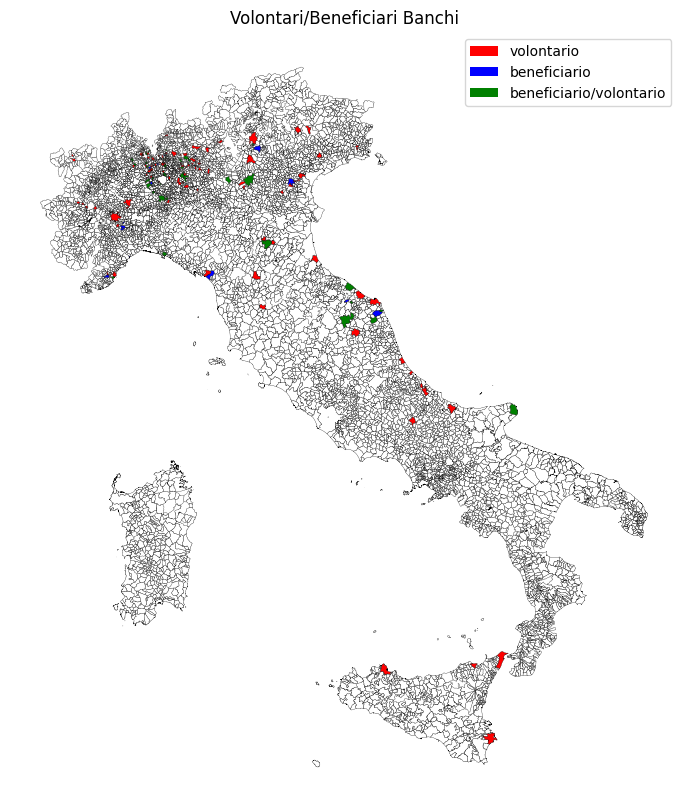

In [ ]:
plot_map_merged(df_banchi_def,'Volontari/Beneficiari Banchi', 'ruolo_merged')

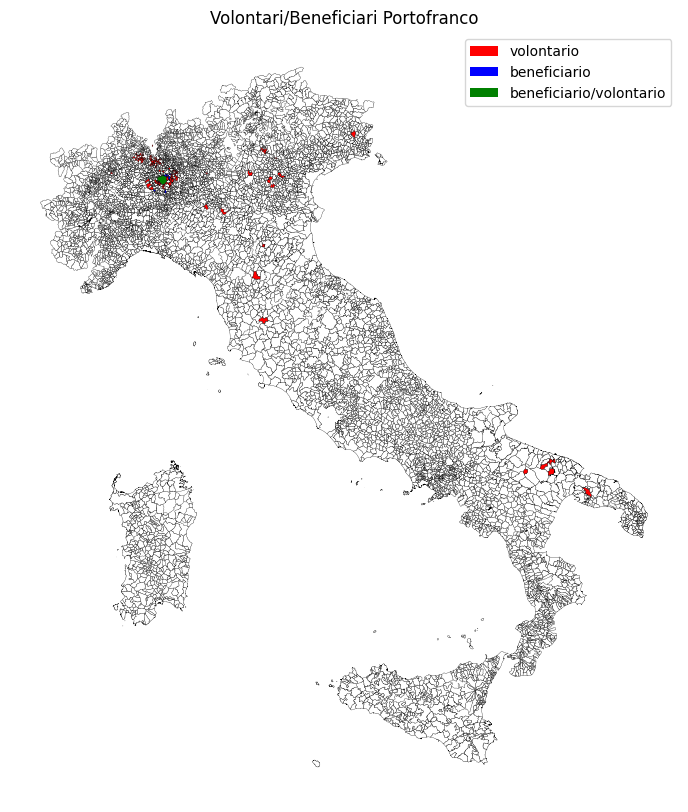

In [ ]:
plot_map_merged(df_porto_def,'Volontari/Beneficiari Portofranco', 'ruolo_merged')

## Barchart

In [ ]:
ben_porto['COMUNE'] = ben_porto['COMUNE'].str.lower()
ben_porto['COMUNE'] = ben_porto['COMUNE'].astype(str)
df = ben_porto.merge(df_integ_1, on='COMUNE')

In [ ]:
xy = df_integ_0[df_integ_0['ambito_scolastico'].isnull()==False][['COMUNE','score','ambito_scolastico']].groupby(by='COMUNE').mean()
xy = xy[xy['score'].isnull()==False]

In [ ]:
categories = []
for i, row in xy.iterrows():
  if row.score > 0:
    categories.append('blue')
  else:
    categories.append('red')

xy['colors'] = categories

In [ ]:
xy['colors']

COMUNE
bresso                blue
carugate               red
cologno monzese       blue
corsico               blue
milano                blue
pioltello             blue
sesto san giovanni    blue
vidigulfo              red
Name: colors, dtype: object

In [ ]:
xy = xy.sort_values(by='ambito_scolastico', ascending=False)
xy

,score,ambito_scolastico,colors
COMUNE,,,
carugate,-0.017250,4.000000,red
milano,0.088410,4.000000,blue
cologno monzese,0.114162,3.750000,blue
corsico,0.217787,3.750000,blue
pioltello,0.173015,3.500000,blue
bresso,0.032117,3.166667,blue
sesto san giovanni,0.123757,3.166667,blue
vidigulfo,-0.293633,2.500000,red


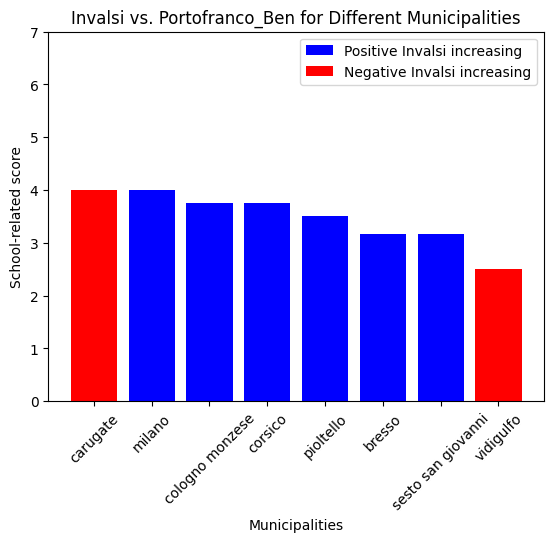

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the data for the two lines
x = np.linspace(0, 10, 100)
y1 = x**2
y2 = x**3

# Plot the two lines
plt.bar(xy.index.to_list(), xy['ambito_scolastico'], color=xy['colors'])
#plt.scatter(xy.index.to_list(), xy['ambito_scolastico'], color='blue', label='ambito_scolastico')

# Add a title and labels to the axes
plt.title('Invalsi vs. Portofranco_Ben for Different Municipalities')
plt.xlabel('Municipalities')
plt.xticks(rotation=45)
plt.ylabel('School-related score')
plt.ylim(0, 7)
# Create custom color patches for the legend
blue_patch = plt.Rectangle((0, 0), 1, 1, fc='blue', label='Positive Invalsi increasing')
red_patch = plt.Rectangle((0, 0), 1, 1, fc='red', label='Negative Invalsi increasing')

# Add the legend
plt.legend(handles=[blue_patch, red_patch])


# Show the plot
plt.show()


## Mappa coropletica

In [ ]:
df_integ_1[df_integ_1['score'].isnull() == False]['score']

635     2.774243
742     3.563359
835     3.699728
839     3.785354
851     3.904680
855     4.013138
856     4.013138
1075    3.762110
1076    3.762110
1080    3.773928
1187    3.443771
Name: score, dtype: float64

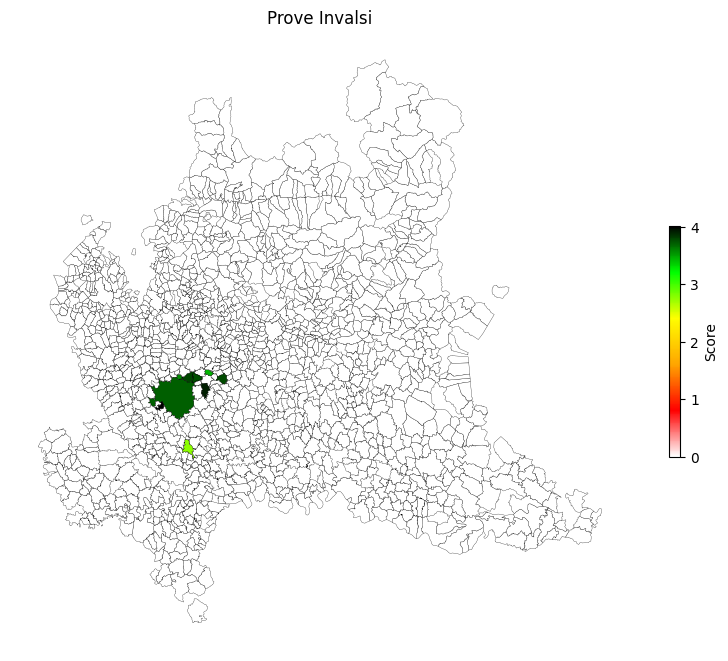

In [ ]:
plot_map(df_integ_1,'Prove Invalsi', 'score')

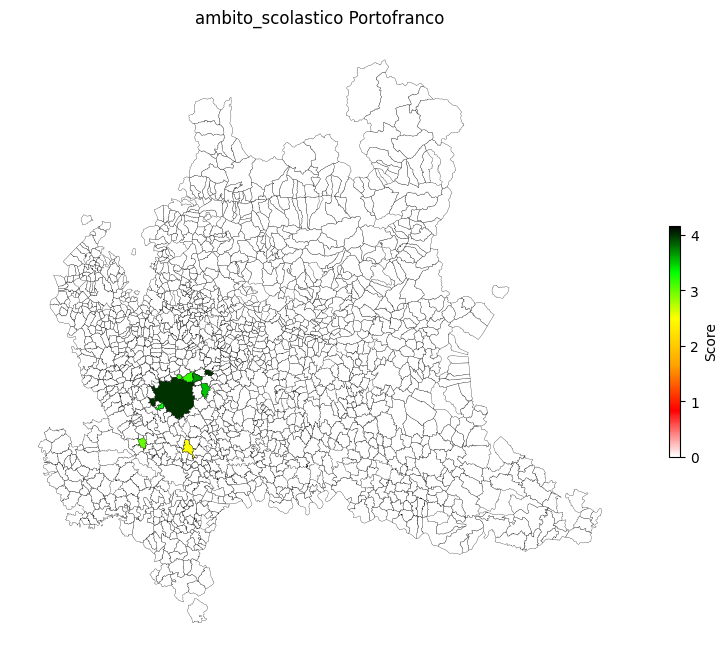

In [ ]:
plot_map(df_integ_1,'ambito_scolastico Portofranco', 'ambito_scolastico')